In [1]:
import sys, os, pandas
import uproot
import matplotlib.pyplot as plt

In [2]:
filename = "../ntuplesPixel/Run300806.root"
#plot_dir = "../ntuplesPixel/plots/" + (filename.split("/")[-1]).split(".")[-2] + "/"
#os.mkdir(plot_dir)
print("Opening %s" % filename)
file = uproot.open(filename)
tree = file[b'a/tree;1']

Opening ../ntuplesPixel/Run300806.root


In [51]:
df_grid = tree.pandas.df([b'size', b'cols', b'rows', b'pos_x', b'pos_y', b'x', b'y'], entrystop=10000)

In [52]:
df_selected = df_grid.query('((pos_x % 52) > 0) & ((pos_x % 52) < 43 ) & (((pos_x % 52) + cols) < 43)')
#df_selected = df_grid.query('((pos_x % 52) > 0) & ((pos_x % 52) < 43 )')

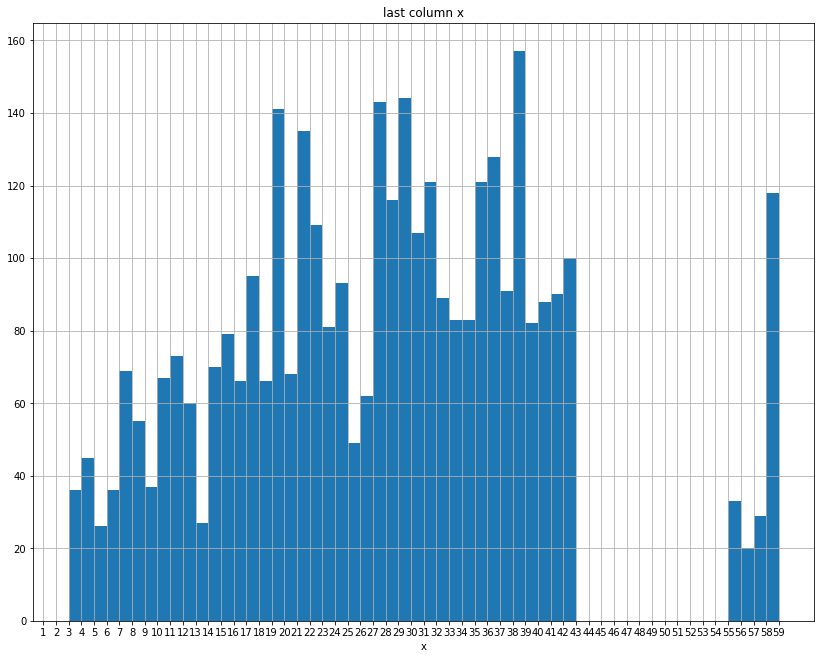

3588.0


In [73]:
import numpy as np
pos_x = df_selected['pos_x'].values
cols = df_selected['cols'].values
last_col = pos_x + cols
df_52 = df_selected.query('pos_x + cols < 60')
pos_x = df_52['pos_x'].values
cols = df_52['cols'].values
last_col = pos_x + cols

fig = plt.figure(figsize=(14,11))
ax = fig.add_subplot(1,1,1)
ax.set_xticks(range(last_col.max()+1))
ax.grid(True)
n, bins, patches = plt.hist(last_col, bins=last_col.max()-last_col.min())
plt.title("last column x")
plt.xlabel("x")
plt.show()

somma = 0
for count in n:
    somma += count
print(somma)

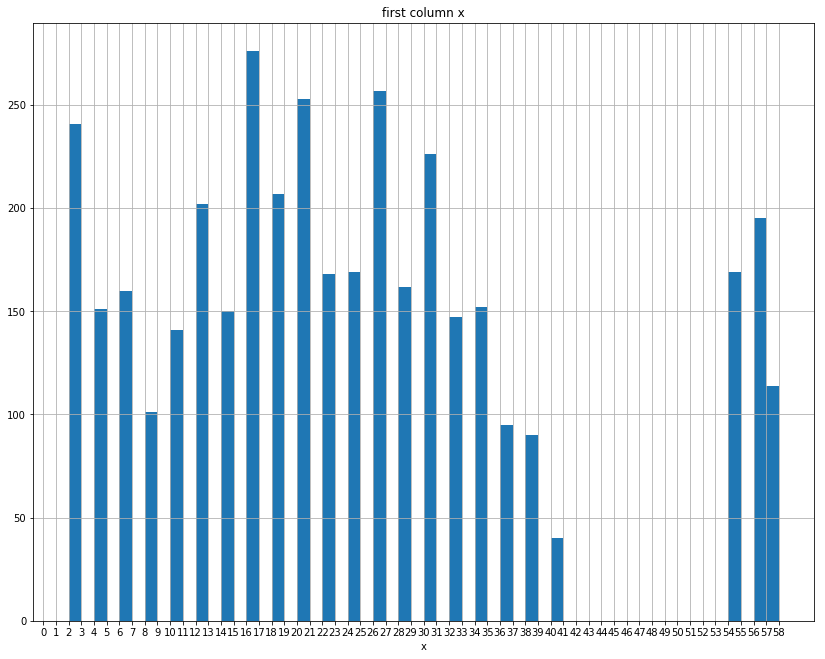

In [74]:
df_52 = df_selected.query('pos_x < 60')
pos_x = df_52['pos_x'].values
cols = df_52['cols'].values
first_col = pos_x

fig2 = plt.figure(figsize=(14,11))
ax2 = fig2.add_subplot(1,1,1)
ax2.set_xticks(range(first_col.max()+1))
ax2.grid(True)
plt.hist(first_col, bins=first_col.max()-first_col.min())
plt.title("first column x")
plt.xlabel("x")
plt.show()

In [50]:
df_debug = df_selected.query('pos_x + cols == 52')
print(df_debug)

Empty DataFrame
Columns: [size, cols, rows, pos_x, pos_y]
Index: []


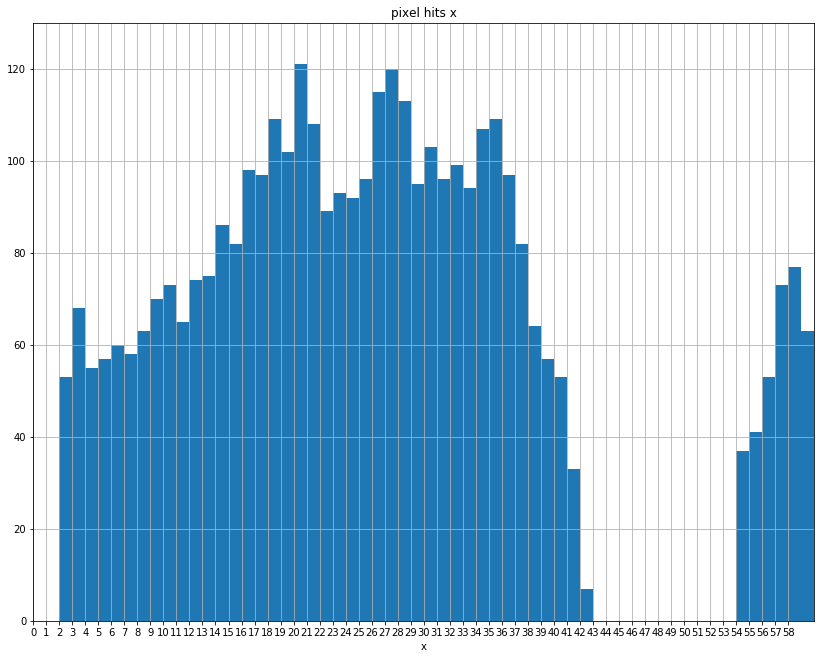

In [75]:
fig3 = plt.figure(figsize=(14,11))
ax3 = fig3.add_subplot(1,1,1)
ax3.set_xticks(range(last_col.max()))
ax3.grid(True)
pixel_hit = df_selected['pos_x'].values + df_selected['x'].values
plt.hist(pixel_hit, bins=pixel_hit.max()-pixel_hit.min())
plt.axis([0, 60, 0, 130])
plt.title("pixel hits x")
plt.xlabel("x")
plt.show()

Plotting grid (7->5) events...


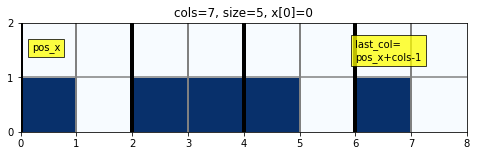

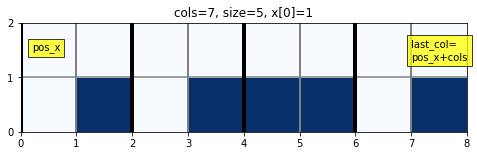

In [114]:
print("Plotting grid (7->5) events...")

def plot_grid(x, filename):
    y = np.zeros_like(x)
    
    fig = plt.figure(figsize=(8.0,2.0))
    ax = fig.add_subplot(1,1,1)
    ax.set_yticks(range(3))
    ax.grid(True)

    h = plt.hist2d(x, y, bins=range(9), cmap="Blues")

    for y_line in [1]:
        plt.axhline(y_line, h[1][0], h[1][-1], color="gray")
    for x_line in range(8):
        linewidth_ = 2
        linecolor = "gray"
        if (int(x_line+0.5)%2) == 0:
            linecolor = "black"
            linewidth_ = 4
        plt.axvline(x_line, 0, 2, color=linecolor, linewidth=linewidth_)

    plt.title("cols=7, size=5, x[0]=%d" % x[0])
    plt.axis([0, 8, 0, 2])
    plt.text(0.2, 1.5, "pos_x", bbox=dict(facecolor='yellow', alpha=0.75))
    if x[-1] == 6:
        plt.text(x[-1], 1.33, "last_col=\npos_x+cols-1", bbox=dict(facecolor='yellow', alpha=0.75))
    else:
        plt.text(x[-1], 1.33, "last_col=\npos_x+cols", bbox=dict(facecolor='yellow', alpha=0.75))
        
    #plt.colorbar()
    #plt.tight_layout()
    #plt.subplots_adjust(right=2.0, top=1.5, wspace=0.2)
    plt.savefig(filename, format="png", dpi=300, bbox_inches="tight")
    return

x = np.array([0, 2, 3, 4, 6])
plot_grid(x)
x = np.array([1, 3, 4, 5, 7])
plot_grid(x)